File 'C:\Users\bhavan pavan\OneDrive\Pictures\Saved Pictures\all_images_data.csv' loaded successfully.


--- 2. Cleaning and Labeling 'Category' ---
Dropped 0 rows due to missing values in 'Category'.
Unique classes in 'Clean_Label' after cleaning: 4
Cleaned labels: ['wrinkles' 'puffy eyes' 'darkspots' 'clear face']


--- 3. Generating Bar Graph for Class Distribution of 'Clean_Label' ---
Bar graph saved as class_distribution_bar_graph.png
Cleaned dataset saved as cleaned_dataset.csv


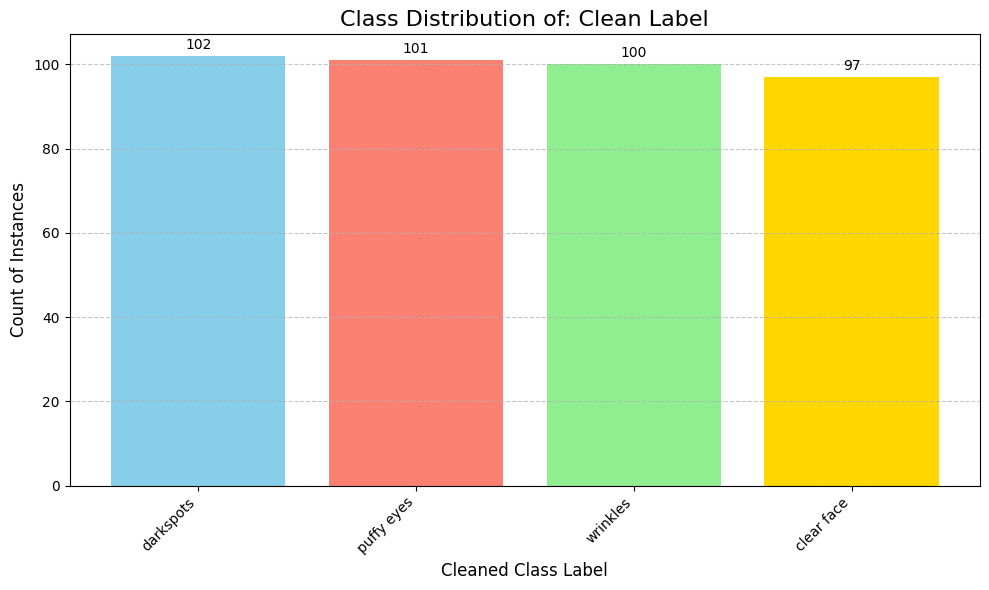

In [5]:
# -----------------------------------------------
#   Module 1
# -----------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

file_path = r'C:\Users\bhavan pavan\OneDrive\Pictures\Saved Pictures\all_images_data.csv' 

try:
    df = pd.read_csv(file_path)
    CLASS_COLUMN = 'Category' 
    print(f"File '{file_path}' loaded successfully.")
    print("\n" + "="*50 + "\n")

    print(f"--- 2. Cleaning and Labeling '{CLASS_COLUMN}' ---")

    initial_rows = len(df)
    df.dropna(subset=[CLASS_COLUMN], inplace=True)
    rows_dropped = initial_rows - len(df)
    print(f"Dropped {rows_dropped} rows due to missing values in '{CLASS_COLUMN}'.")
    df['Clean_Label'] = df[CLASS_COLUMN].astype(str).str.split('-', expand=True)[0].str.lower().str.strip()
    
    analysis_column = 'Clean_Label'
    print(f"Unique classes in '{analysis_column}' after cleaning: {df[analysis_column].nunique()}")
    print("Cleaned labels:", df[analysis_column].unique())
    print("\n" + "="*50 + "\n")
    print(f"--- 3. Generating Bar Graph for Class Distribution of '{analysis_column}' ---")
    class_distribution = df[analysis_column].value_counts().sort_values(ascending=False)

    if class_distribution.empty:
        print("No data available to plot after cleaning.")
    else:
        plt.figure(figsize=(10, max(6, len(class_distribution) * 0.7)))
        
        bars = plt.bar(
            class_distribution.index,      
            class_distribution.values,     
            color=['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral'] 
        )
        plt.title(f'Class Distribution of: {analysis_column.replace("_", " ").title()}', fontsize=16)
        plt.xlabel('Cleaned Class Label', fontsize=12)
        plt.ylabel('Count of Instances', fontsize=12)
        for bar in bars:
            yval = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width()/2, 
                yval + max(class_distribution.values) * 0.01,
                int(yval),                        
                ha='center', va='bottom'
            )
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout() 
        
        # Save and show the plot
        plot_filename = 'class_distribution_bar_graph.png'
        plt.savefig(plot_filename)
        print(f"Bar graph saved as {plot_filename}")

        cleaned_file_path = 'cleaned_dataset.csv'
        df.to_csv(cleaned_file_path, index=False)
        print(f"Cleaned dataset saved as {cleaned_file_path}")

except FileNotFoundError:
    print(f"ERROR: File '{file_path}' not found. Please ensure your CSV is uploaded and named 'data.csv'.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [7]:
# pip install Augmentor

import Augmentor
p = Augmentor.Pipeline(r'clear face')
p.zoom(probability=0.5, min_factor=0.8, max_factor=1.5)
p.flip_top_bottom(probability=0.4)
p.random_brightness(probability=0.3,min_factor=0.5,max_factor=1.2)
p.random_distortion(probability=1, grid_width=4, grid_height=4, magnitude=8)
p.sample(100)

Initialised with 97 image(s) found.
Output directory set to clear face\output.

Processing <PIL.Image.Image image mode=RGB size=640x800 at 0x2549F0EE350>: 100%|██████████| 100/100 [00:03<00:00, 27.42 Samples/s] 


In [8]:
# pip install Augmentor

import Augmentor
p = Augmentor.Pipeline(r'darkspots')
                       
p.zoom(probability=0.5, min_factor=0.8, max_factor=1.5)
p.flip_top_bottom(probability=0.4)
p.random_brightness(probability=0.3,min_factor=0.3,max_factor=1.2)
p.random_distortion(probability=1, grid_width=4, grid_height=4, magnitude=8)
p.sample(100)

Initialised with 99 image(s) found.
Output directory set to darkspots\output.

Processing <PIL.Image.Image image mode=RGB size=268x188 at 0x2549F0ED4F0>: 100%|██████████| 100/100 [00:01<00:00, 60.08 Samples/s]


In [9]:
# pip install Augmentor

import Augmentor
p = Augmentor.Pipeline(r'puffy eyes')
                       
p.zoom(probability=0.5, min_factor=0.8, max_factor=1.5)
p.flip_top_bottom(probability=0.4)
p.random_brightness(probability=0.3,min_factor=0.3,max_factor=1.2)
p.random_distortion(probability=1, grid_width=4, grid_height=4, magnitude=8)
p.sample(100)

Initialised with 101 image(s) found.
Output directory set to puffy eyes\output.

Processing <PIL.Image.Image image mode=RGB size=1386x924 at 0x2549F0EF430>: 100%|██████████| 100/100 [00:02<00:00, 43.80 Samples/s]


In [10]:
# pip install Augmentor

import Augmentor
p = Augmentor.Pipeline(r'wrinkles')
                       
p.zoom(probability=0.5, min_factor=0.8, max_factor=1.5)
p.flip_top_bottom(probability=0.4)
p.random_brightness(probability=0.3,min_factor=0.3,max_factor=1.2)
p.random_distortion(probability=1, grid_width=4, grid_height=4, magnitude=8)
p.sample(100)

Initialised with 100 image(s) found.
Output directory set to wrinkles\output.

Processing <PIL.Image.Image image mode=RGB size=500x750 at 0x2549F0EE850>: 100%|██████████| 100/100 [00:03<00:00, 27.47 Samples/s] 


In [6]:
%%capture
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


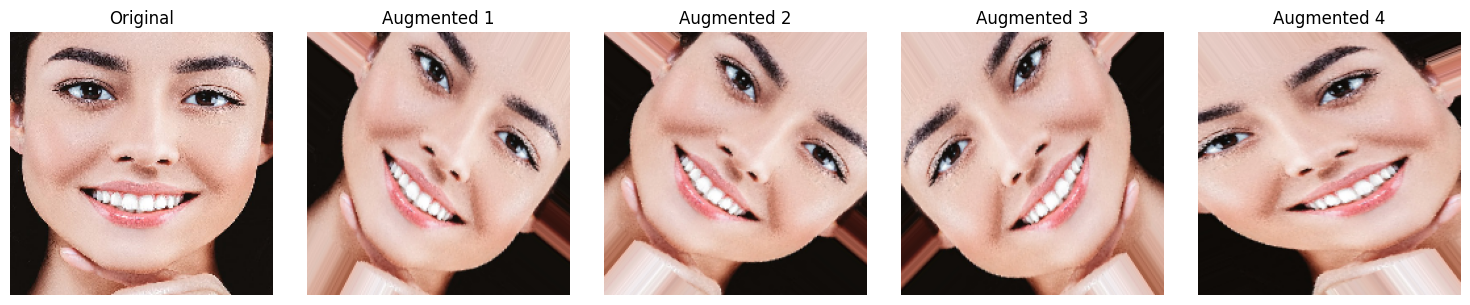

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import matplotlib.pyplot as plt

image_path = r"C:\Users\bhavan pavan\OneDrive\Pictures\1.jpg"

datagen = ImageDataGenerator(
    rotation_range=40,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

img = load_img(image_path, target_size=(200, 200))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
axes[0].imshow(img)
axes[0].set_title("Original")

i = 0
for batch in datagen.flow(x, batch_size=1):
    aug_img = array_to_img(batch[0])
    axes[i + 1].imshow(aug_img)
    axes[i + 1].set_title(f"Augmented {i+1}")
    i += 1
    if i >= 4:
        break

for ax in axes:
    ax.axis("off")
plt.tight_layout()
plt.show()


Found 235 images belonging to 4 classes.
Found 62 images belonging to 4 classes.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         5,124 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 4,012,672 (15.31 MB)

 Non-trainable params: 42,023 (164.16 KB)

C:\Users\bhavan pavan\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


C:\Users\bhavan pavan\anaconda3\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 121s 6s/step - accuracy: 0.4000 - loss: 1.5191 - val_accuracy: 0.3387 - val_loss: 1.3454
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.5574 - loss: 1.1078 - val_accuracy: 0.3387 - val_loss: 1.2660
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.6851 - loss: 0.8241 - val_accuracy: 0.3387 - val_loss: 1.2691
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.6766 - loss: 0.7795 - val_accuracy: 0.3387 - val_loss: 1.2448
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.7915 - loss: 0.5236 - val_accuracy: 0.3387 - val_loss: 1.3382
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.8000 - loss: 0.4726 - val_accuracy: 0.3387 - val_loss: 1.4996
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.8553 - loss: 0.4475 - val_accuracy: 0.3387 - val_loss: 1.5230
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.9106 - loss: 0.3740 - val_accuracy: 0.3387 - val_loss: 2.1073
Epoch 9/10
8/8 ━━━

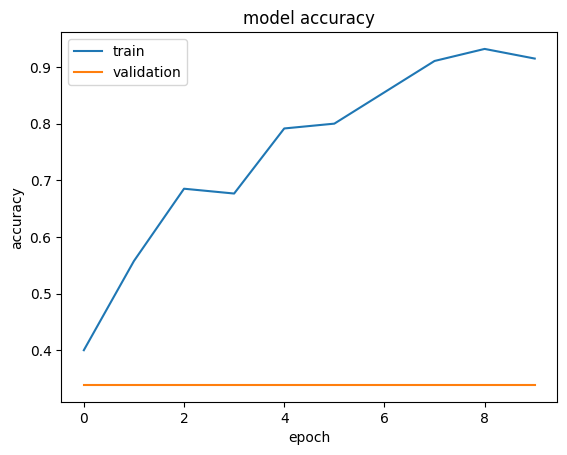

In [1]:
# -------------------------------------
# Module 3
# -------------------------------------
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
import zipfile
import os
      
NUM_CLASSES = 4  
IMG_SIZE = 224


zip_file_path = r'C:\Users\bhavan pavan\Downloads\dataset2.zip' 
extract_dir = r'C:\Users\bhavan pavan\Downloads\dataset2'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Data preprocessing
train_dir = os.path.join(extract_dir, 'train')  
validation_dir = os.path.join(extract_dir, 'val')  

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='categorical')

NUM_CASSES = train_generator.num_classes
# Model definition
inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
base_model = EfficientNetB0(include_top=False, weights=None, input_shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Train the model
hist = model.fit(train_generator, epochs=10, validation_data=validation_generator)
import matplotlib.pyplot as plt

def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

plot_hist(hist)

In [ ]:
# -----------------------------
# Module 4
# -----------------------------
import cv2
import os
import zipfile
import shutil
from deepface import DeepFace
from random import randint

# ---------- CONFIGURATION ----------

image_path = r'C:\Users\bhavan pavan\OneDrive\Pictures\10.jpg'

dataset_path = r'C:\Users\bhavan pavan\Downloads\dataset2.zip'

TEMP_DATA_DIR = 'temp_unzipped_dataset'


FACE_CASCADE = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# ---------- DEFINE AGE RANGE & SKIN TYPE LOGIC ----------
def get_skin_info_from_condition(condition_label):
    """Returns a tuple of (age_range, skin_type) based on the condition."""
    condition = condition_label.lower().replace(' ', '')
    
    if "clearface" in condition:
        age_range = randint(18, 30)
        skin_type = "Normal / Combination"
    elif "darkspots" in condition:
        age_range = randint(30, 45)
        skin_type = "Sun-Damaged / Sensitive"
    elif "puffyeyes" in condition:
        age_range = randint(40, 55)
        skin_type = "Fatigued / Dry"
    elif "wrinkles" in condition:
        age_range = randint(55, 75)
        skin_type = "Mature / Aged"
    else:
        age_range = randint(60, 80)
        skin_type = "Oily / Problematic" 
        
    return age_range, skin_type

# ---------- FUNCTION TO PROCESS ONE IMAGE ----------
def process_image(img_path, condition_label):
    print(f"\nProcessing: {img_path}")
    
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Could not load image at {img_path}")
        return

    try:
        est_age_range, skin_type = get_skin_info_from_condition(condition_label)
        
        
        analysis = DeepFace.analyze(img_path=img_path, actions=['age'], enforce_detection=True) 
        real_age = analysis[0]['age']

        
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
        faces = FACE_CASCADE.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

       
        if len(faces) > 0:
            x, y, w, h = faces[0]
            
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            print(f"Haar Cascade detected a face at: ({x}, {y}, {w}, {h})")
        else:
            print("Haar Cascade did NOT detect a face. Showing original image without box.")


      
        print(f"Condition: {condition_label}")
        print(f"Inferred Skin Type: {skin_type}")
        print(f"Predicted Real Age (AI): {real_age}")
        print(f"Inferred Age Range: {est_age_range}")
        
        
        text1 = f"Condition: {condition_label} | Type: {skin_type}"
     
        text2 = f"Age (AI): {real_age} | Inferred: {est_age_range}"
        

        cv2.putText(img, text1, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 
                    0.7, (0, 255, 0), 2, cv2.LINE_AA)
        
        cv2.putText(img, text2, (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 
                    0.7, (0, 255, 0), 2, cv2.LINE_AA)
        
  
        cv2.imshow("Skin Analysis with Haar Cascade Detection", img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
            
    except Exception as e:
        print(f"Error processing {img_path}: {e}")

# ---------- CASE 1: Single Image ----------
if os.path.isfile(image_path) and image_path.lower().endswith(('.jpg', '.jpeg', '.png')):
    # Manually assign the condition for a single test image
    condition_label = "wrinkles"  
    process_image(image_path, condition_label)

# ---------- CASE 2: Multiple Images in Zipped Dataset ----------
elif os.path.isfile(dataset_path) and dataset_path.lower().endswith('.zip'):
    print(f"Found dataset zip file: {dataset_path}. Unzipping...")
    

    try:
        with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
          
            zip_ref.extractall(TEMP_DATA_DIR)
        print(f"Dataset successfully extracted to {TEMP_DATA_DIR}.")

        
        for condition_folder in os.listdir(TEMP_DATA_DIR):
            condition_path = os.path.join(TEMP_DATA_DIR, condition_folder)
            
           
            if not os.path.isdir(condition_path):
                continue
                
            print(f"\n--- Processing folder: {condition_folder} ---")
            
            for img_file in os.listdir(condition_path):
                if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    img_path = os.path.join(condition_path, img_file)
                    # The folder name is used as the condition_label
                    process_image(img_path, condition_folder)
                    
    except Exception as e:
        print(f"An error occurred during zip processing: {e}")
        
    finally:
        
        if os.path.exists(TEMP_DATA_DIR):
            print(f"\nCleaning up temporary directory: {TEMP_DATA_DIR}")
            shutil.rmtree(TEMP_DATA_DIR)
            
else:
    print("\nERROR: Neither a valid single image nor a valid zip dataset path was found. Please check your CONFIGURATION.")



Processing: C:\Users\bhavan pavan\OneDrive\Pictures\10.jpg
Haar Cascade detected a face at: (296, 55, 411, 411)
Condition: wrinkles
Inferred Skin Type: Mature / Aged
Predicted Real Age (AI): 25
Inferred Age Range: 75
